## Classificação de variáveis

In [51]:
df_firstn = pd.read_csv("Iowa_Liquor_Sales.csv", nrows=1)
df_firstn

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56,Lee,NaN,NaN,255,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.5,1.19


## Análise exploratória dataset Iowa_Liquor_Sales

### Importando as bibliotecas 

In [52]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## Escolha das colunas do dataset para a análise exploratória

In [53]:
req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Criação do dataframe df contendo as colunas selecionadas previamente através da lista req_cols. Isso diminui bastante o dataset e possibilita a sua análise

In [54]:
df = pd.read_csv("Iowa_Liquor_Sales.csv", usecols=req_cols)

In [55]:
df['City'].isnull().values.any()

True

In [56]:
df['County'].isnull().values.any()

True

In [57]:
df['Item Description'].isnull().values.any()

False

In [58]:
df['State Bottle Cost'].isnull().values.any()

True

In [59]:
df['State Bottle Retail'].isnull().values.any()

True

In [60]:
df['Volume Sold (Liters)'].isnull().values.any()

False

### Eliminamos os valores NaN da tabela para diminuir o tamanho do dataset

In [61]:
df=df.dropna()

### Para ter uma ideia inicial dos dados os quais dispomos, iremos utilizar o head e logo em seguida o tail com as 20 primeiras e 20 últimas linhas do dataset:

In [62]:
df.head(20)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
0,11/20/2015,KEOKUK,Lee,Templeton Rye w/Flask,$18.09,$27.14,4.50
1,11/21/2015,CLARINDA,Page,Templeton Rye w/Flask,$18.09,$27.14,9.00
2,11/16/2015,FORT MADISON,Lee,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$6.40,$9.60,0.30
3,11/04/2015,IOWA CITY,Johnson,Knob Creek w/ Crystal Decanter,$35.55,$53.34,5.25
4,11/17/2015,TOLEDO,Tama,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$6.40,$9.60,0.30
5,11/11/2015,HOLSTEIN,Ida,Knob Creek w/ Crystal Decanter,$35.55,$53.34,1.75
6,11/09/2015,WATERLOO,Black Hawk,Forbidden Secret Coffee Pack,$11.62,$17.43,9.00
7,11/10/2015,TOLEDO,Tama,Knob Creek w/ Crystal Decanter,$35.55,$53.34,3.50
8,11/30/2015,MUSCATINE,Muscatine,Laphroaig w/ Whiskey Stones,$19.58,$29.37,3.00
9,11/16/2015,DUNLAP,Harrison,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$6.40,$9.60,0.30


In [63]:
df.tail(20)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591057,10/31/2017,Sheldon,OBRIEN,Kahlua Coffee Liqueur,$11.99,$17.99,0.75
12591058,10/31/2017,Sheldon,OBRIEN,Arrow Creme De Menthe White,$4.74,$7.11,0.75
12591059,10/31/2017,Sheldon,OBRIEN,Absolut Swedish Vodka 80 Prf,$6.49,$9.74,0.37
12591060,10/31/2017,Sheldon,OBRIEN,Captain Morgan Spiced Rum Pet,$2.75,$4.13,0.40
12591061,10/31/2017,Sheldon,OBRIEN,Sailor Jerry Spiced Navy Rum,$4.80,$7.20,0.75
12591062,10/31/2017,Sheldon,OBRIEN,Southern Comfort,$4.78,$7.17,0.75
12591063,10/31/2017,Sheldon,OBRIEN,Beam's 8 Star Bl Whiskey,$2.09,$3.14,1.12
12591064,10/31/2017,Sheldon,OBRIEN,Crown Royal Regal Apple,$8.00,$12.00,0.37
12591065,10/31/2017,Sheldon,OBRIEN,Jose Cuervo Especial Silver,$5.50,$8.25,0.37
12591066,10/31/2017,Sheldon,OBRIEN,Jose Cuervo Especial Reposado Flask,$5.50,$8.25,0.37


### Parece que precisaremos realizar algum tipo de transformação nesses dados. Pode-se perceber que às vezes o nome da cidade ou condado aparece com nome maiúsculo e às vezes minusculo. por via das dúvidas iremos fazer isso com a descrição do item também. Isso influencia de alguma forma nossa análise.

In [64]:
df['City'] = df['City'].str.upper()
df['County'] = df['County'].str.upper()
df['Item Description'] = df['Item Description'].str.upper()

In [65]:
df.tail(20)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591057,10/31/2017,SHELDON,OBRIEN,KAHLUA COFFEE LIQUEUR,$11.99,$17.99,0.75
12591058,10/31/2017,SHELDON,OBRIEN,ARROW CREME DE MENTHE WHITE,$4.74,$7.11,0.75
12591059,10/31/2017,SHELDON,OBRIEN,ABSOLUT SWEDISH VODKA 80 PRF,$6.49,$9.74,0.37
12591060,10/31/2017,SHELDON,OBRIEN,CAPTAIN MORGAN SPICED RUM PET,$2.75,$4.13,0.40
12591061,10/31/2017,SHELDON,OBRIEN,SAILOR JERRY SPICED NAVY RUM,$4.80,$7.20,0.75
12591062,10/31/2017,SHELDON,OBRIEN,SOUTHERN COMFORT,$4.78,$7.17,0.75
12591063,10/31/2017,SHELDON,OBRIEN,BEAM'S 8 STAR BL WHISKEY,$2.09,$3.14,1.12
12591064,10/31/2017,SHELDON,OBRIEN,CROWN ROYAL REGAL APPLE,$8.00,$12.00,0.37
12591065,10/31/2017,SHELDON,OBRIEN,JOSE CUERVO ESPECIAL SILVER,$5.50,$8.25,0.37
12591066,10/31/2017,SHELDON,OBRIEN,JOSE CUERVO ESPECIAL REPOSADO FLASK,$5.50,$8.25,0.37


### Vamos retirar os cifrões do preço de custo e do preço de venda para facilitar futuras operações com esses números :

In [66]:
df['State Bottle Cost'] = df['State Bottle Cost'].replace({'\$':''}, regex = True)
df['State Bottle Retail'] = df['State Bottle Retail'].replace({'\$':''}, regex = True)

### Temos também um problema com o condado de O'BRIEN, pois algumas vezes ele aparece com ou sem a aspa simples

In [67]:
df.head(20)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
0,11/20/2015,KEOKUK,LEE,TEMPLETON RYE W/FLASK,18.09,27.14,4.50
1,11/21/2015,CLARINDA,PAGE,TEMPLETON RYE W/FLASK,18.09,27.14,9.00
2,11/16/2015,FORT MADISON,LEE,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30
3,11/04/2015,IOWA CITY,JOHNSON,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,5.25
4,11/17/2015,TOLEDO,TAMA,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30
5,11/11/2015,HOLSTEIN,IDA,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,1.75
6,11/09/2015,WATERLOO,BLACK HAWK,FORBIDDEN SECRET COFFEE PACK,11.62,17.43,9.00
7,11/10/2015,TOLEDO,TAMA,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,3.50
8,11/30/2015,MUSCATINE,MUSCATINE,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,3.00
9,11/16/2015,DUNLAP,HARRISON,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30


In [68]:
df.tail(20)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591057,10/31/2017,SHELDON,OBRIEN,KAHLUA COFFEE LIQUEUR,11.99,17.99,0.75
12591058,10/31/2017,SHELDON,OBRIEN,ARROW CREME DE MENTHE WHITE,4.74,7.11,0.75
12591059,10/31/2017,SHELDON,OBRIEN,ABSOLUT SWEDISH VODKA 80 PRF,6.49,9.74,0.37
12591060,10/31/2017,SHELDON,OBRIEN,CAPTAIN MORGAN SPICED RUM PET,2.75,4.13,0.40
12591061,10/31/2017,SHELDON,OBRIEN,SAILOR JERRY SPICED NAVY RUM,4.80,7.20,0.75
12591062,10/31/2017,SHELDON,OBRIEN,SOUTHERN COMFORT,4.78,7.17,0.75
12591063,10/31/2017,SHELDON,OBRIEN,BEAM'S 8 STAR BL WHISKEY,2.09,3.14,1.12
12591064,10/31/2017,SHELDON,OBRIEN,CROWN ROYAL REGAL APPLE,8.00,12.00,0.37
12591065,10/31/2017,SHELDON,OBRIEN,JOSE CUERVO ESPECIAL SILVER,5.50,8.25,0.37
12591066,10/31/2017,SHELDON,OBRIEN,JOSE CUERVO ESPECIAL REPOSADO FLASK,5.50,8.25,0.37


<AxesSubplot:>

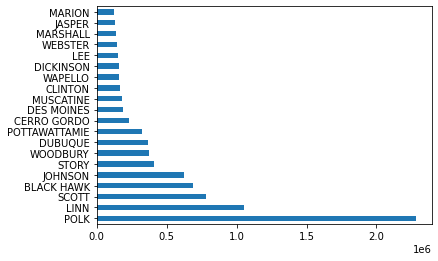

In [69]:
county_sales = df['County'].value_counts().nlargest(20)
county_sales.plot(kind="barh")

<AxesSubplot:>

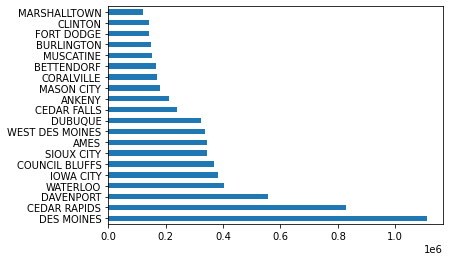

In [70]:
city_sales = df['City'].value_counts().nlargest(20)
city_sales.plot(kind="barh")

In [ ]:
df_cities_and_counties = df[["City","County"]]
df_cities_and_counties
#polk = df_cities_and_counties[df_cities_and_counties["County"]=="Polk"]
#polk_cities = polk["City"].value_counts().plot(kind="barh")